In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it

from matplotlib import cm
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression 
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.regression.linear_model import OLS
from statsmodels.regression.linear_model import RegressionResults
from sklearn.metrics import r2_score

%matplotlib inline

## Assignment 6: model selection and manifold learning

### Exercise 1
* Load the data set from file prostate.csv
* Carry out a best-subset linear regression analysis.
* Compute the AIC, BIC, five- and tenfold cross-validation estimates of prediction error
* Make conclusion

Prostate data info:

Predictors:
* lcavol
* lweight
* age
* lbph
* svi
* lcp
* gleason
* pgg45

outcome:
* lpsa

#### Reading the data
##### without scaling

In [3]:
data = pd.read_csv('prostate.csv')
columns = list(data.columns)
n_samples = data.shape[0]
X, y = np.asarray(data)[:, :-1], np.asarray(data)[:, -1]

data

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
5,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0,0.765468
6,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468
7,0.693147,3.539509,58,1.536867,0,-1.386294,6,0,0.854415
8,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0,1.047319
9,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319


##### with scaling

In [288]:
df = pd.read_csv(open("prostate.csv"))
col = list(df.columns)

#scaling the data
df = scale(df)
data = pd.DataFrame(df, columns=col)

X, y = np.asarray(data)[:, :-1], np.asarray(data)[:, -1]

data

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-2.533318
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-2.299712
2,-1.587021,-2.200154,1.368234,-1.030029,-0.525657,-0.867655,0.344407,-0.156155,-2.299712
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-2.299712
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-1.834631
5,-2.046706,-0.938806,-1.872101,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-1.491617
6,-0.522668,-0.364678,0.018095,0.356701,-0.525657,-0.867655,-1.047571,-0.868957,-1.491617
7,-0.560208,-0.209841,-0.791989,0.995291,-0.525657,-0.867655,-1.047571,-0.868957,-1.414162
8,-1.813627,-0.209841,-2.277143,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-1.246180
9,-0.961052,-0.901927,-0.116919,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-1.246180


#### Generating all combinations

In [4]:
combinations = []
for k in range(1, 9):
    comb = np.array(list(it.combinations(columns[:-1], k)))
    combinations.append(comb)


all_combinations = []
for i in range(len(combinations)):
    all_combinations += combinations[i].tolist()
all_combinations = np.array(all_combinations)

num_combinations = len(all_combinations)
print('num of combinations', num_combinations)

num of combinations 255


#### All scores

In [5]:
aic_scores, bic_scores, fivefold, tenfold = [], [], [], []
for i in range(num_combinations):
    combination = all_combinations[i]
    X = np.asarray(data[combination])
    LS = OLS(y, X)
    regression = LS.fit()
    aic_scores.append(regression.aic)
    bic_scores.append(regression.bic)
    fivefold.append(cross_val_score(LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=5).mean())
    tenfold.append(cross_val_score(LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=10).mean())

#### Result

In [6]:
print('------------Best-subset solution for different scores------------')
print('AIC:', all_combinations[np.argmin(np.abs(aic_scores))], 'Score', aic_scores[np.argmin(np.abs(aic_scores))])
print('BIC:', all_combinations[np.argmin(np.abs(bic_scores))], 'Score', bic_scores[np.argmin(np.abs(bic_scores))])
print('Fivefold CV:', all_combinations[np.argmax(fivefold)], 'Score', np.max(fivefold))
print('Tenfold CV:', all_combinations[np.argmax(tenfold)], 'Score', np.max(tenfold))

------------Best-subset solution for different scores------------
AIC: ['lcavol', 'lweight', 'age', 'lbph', 'svi'] Score 209.890431745
BIC: ['lcavol', 'lweight', 'svi'] Score 219.430388553
Fivefold CV: ['lcavol', 'lweight', 'age', 'pgg45'] Score -0.879996803861
Tenfold CV: ['lcavol', 'lweight', 'age', 'pgg45'] Score -0.719101765797


### Exercise 2
* Apply dimensionality reduction, try PCA, LLE, MDS, Laplacian Eigenmaps and t-SNE. Visualize data set.
* What can you say about clusters in the dataset?
* Build linear regression models using output produced by for different dimensionalities. Compute quality of the models.
* Make conclusion.

#### PCA

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [8]:
color_labels = y
colors = [cm.Vega10((y_) / max(color_labels)) for y_ in color_labels]

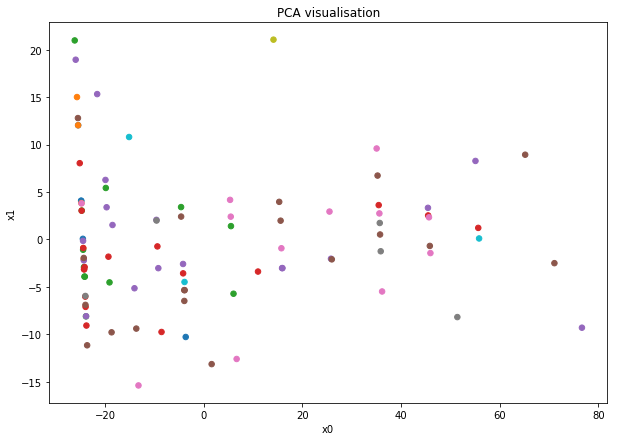

In [9]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s = 30)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('PCA visualisation')

In [10]:
LS = OLS(y, X_pca)
regression_pca = LS.fit()
print('-----Scores2D-----')
print('AIC =', regression_pca.aic)
print('BIC =', regression_pca.bic)

-----Scores2D-----
AIC = 471.035373372
BIC = 476.184795329


#### LLE

In [296]:
lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(X)

In [297]:
color_labels = data['lcavol']
colors = [cm.Vega10((y_) / max(color_labels)) for y_ in color_labels]

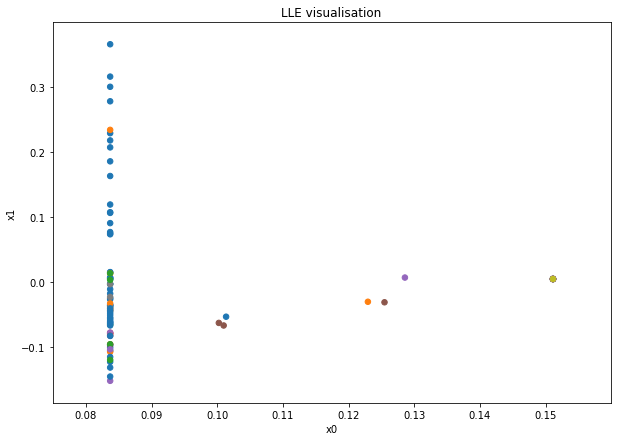

In [298]:
plt.figure(figsize=(10, 7))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=colors, s = 30)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('LLE visualisation')

In [299]:
LS = OLS(y, X_lle)
regression_lle = LS.fit()
print('-----Scores-----')
print('AIC =', regression_lle.aic)
print('BIC =', regression_lle.bic)

-----Scores-----
AIC = 262.31155864
BIC = 267.460980597


#### MDS

In [300]:
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)

In [301]:
color_labels = data['lcavol']
colors = [cm.Vega10((y_) / max(color_labels)) for y_ in color_labels]

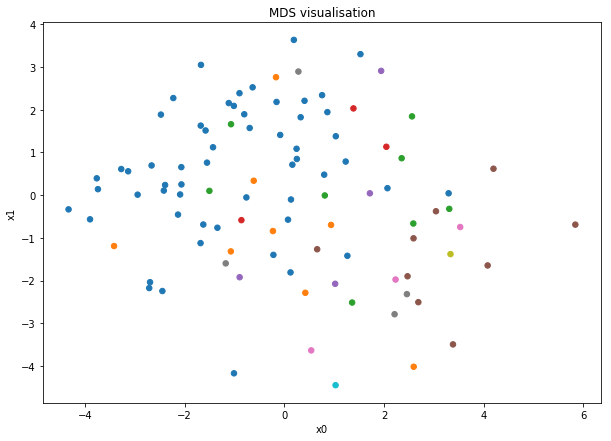

In [302]:
plt.figure(figsize=(10, 7))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=colors, s = 30)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('MDS visualisation')

In [303]:
LS = OLS(y, X_mds)
regression_mds = LS.fit()
print('-----Scores-----')
print('AIC =', regression_mds.aic)
print('BIC =', regression_mds.bic)

-----Scores-----
AIC = 217.726245378
BIC = 222.875667335


#### Laplacian Eigenmaps (Spectral Embedding)

In [304]:
se = SpectralEmbedding(n_components=2)
X_se = se.fit_transform(X)

In [305]:
color_labels = data['lcavol']
colors = [cm.Vega10((y_) / max(color_labels)) for y_ in color_labels]

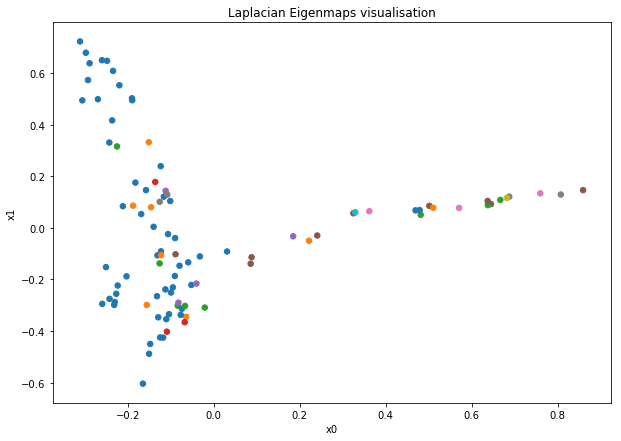

In [306]:
plt.figure(figsize=(10, 7))
plt.scatter(X_se[:, 0], X_se[:, 1], c=colors, s = 30)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Laplacian Eigenmaps visualisation')

In [307]:
LS = OLS(y, X_se)
regression_se = LS.fit()
print('-----Scores-----')
print('AIC =', regression_se.aic)
print('BIC =', regression_se.bic)

-----Scores-----
AIC = 215.719686343
BIC = 220.8691083


#### t-SNE

In [308]:
tsne = TSNE(n_components=2, )
X_tsne = tsne.fit_transform(X)

In [309]:
color_labels = data['lweight']
colors = [cm.Vega10((y_) / max(color_labels)) for y_ in color_labels]

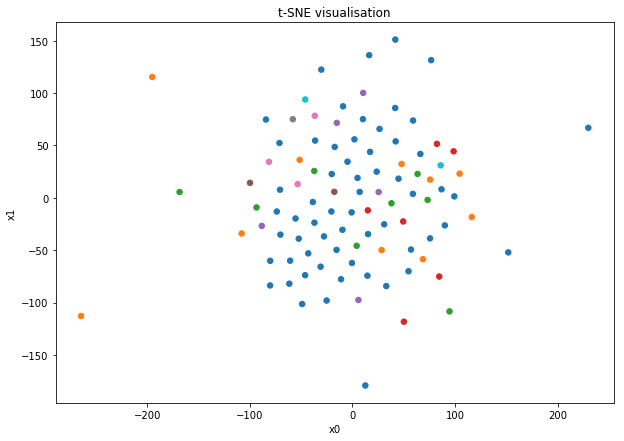

In [310]:
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, s = 30)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('t-SNE visualisation')

In [311]:
LS = OLS(y, X_tsne)
regression_tsne = LS.fit()
print('-----Scores-----')
print('AIC =', regression_tsne.aic)
print('BIC =', regression_tsne.bic)

-----Scores-----
AIC = 268.932595328
BIC = 274.082017285


In [312]:
print ('Is NAN?', np.isnan(X).any())
print ('Is INF?', np.isinf(X).any())

Is NAN? False
Is INF? False


#### Results

You can change the list of dimensions

In [14]:
dimensions = [2, 3, 4, 5]

methods = [PCA, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE]

col = ['AIC', 'BIC']

ind = []

df = pd.DataFrame(columns=col, index=ind)
for method in methods:
    for dim in dimensions:
        X_tr = method(n_components=dim).fit_transform(X)
        LS = OLS(y, X_tr)
        regression_tr = LS.fit()
        aic, bic = regression_tr.aic, regression_tr.bic
        ind = str(method)[:-2].split('.')[-1] + ' ' + ('dim=%s' % dim)
        df1 = pd.DataFrame(columns=col, 
                           index=[ind])
        df1.loc[ind] = [aic, bic]
        df = df.append(df1)

In [15]:
df

,AIC,BIC
PCA dim=2,471.035,476.185
PCA dim=3,471.562,479.286
PCA dim=4,468.883,479.182
PCA dim=5,469.495,482.369
LocallyLinearEmbedding dim=2,473.963,479.113
LocallyLinearEmbedding dim=3,474.684,482.408
LocallyLinearEmbedding dim=4,471.181,481.479
LocallyLinearEmbedding dim=5,474.339,487.212
MDS dim=2,470.998,476.147
MDS dim=3,472.606,480.33


In [13]:
print ('Best w.r.t AIC -', np.argmin(df['AIC']))
print('Best w.r.t BIC -' , np.argmin(df['BIC']))

Best w.r.t AIC - PCA dim=4
Best w.r.t BIC - SpectralEmbedding dim=2
